## Data Inspection

In [20]:
import pandas as pd

df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())


(253680, 22)
Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity     

In [ ]:
# Binary Target
df['Diabetes_binary'] = df['Diabetes_012'].apply(lambda x: 1 if x > 0 else 0)


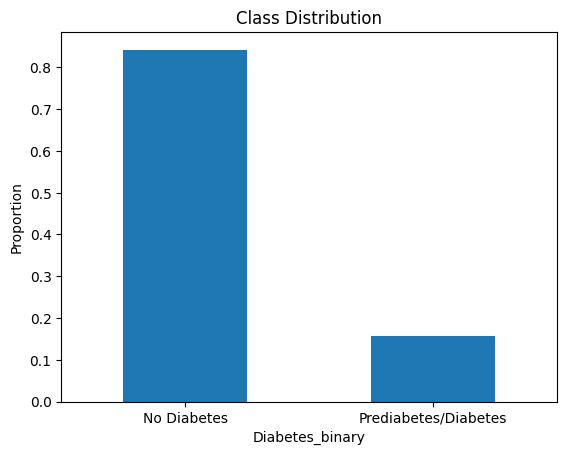

In [22]:
import matplotlib.pyplot as plt

df['Diabetes_binary'].value_counts(normalize=True).plot(kind='bar')
plt.xticks([0, 1], ['No Diabetes', 'Prediabetes/Diabetes'], rotation=0)
plt.title('Class Distribution')
plt.ylabel('Proportion')
plt.show()


Diabetes_binary         1.000000
Diabetes_012            0.983304
GenHlth                 0.300785
HighBP                  0.270334
BMI                     0.223851
DiffWalk                0.222155
HighChol                0.210290
Age                     0.185891
HeartDiseaseorAttack    0.176933
PhysHlth                0.174948
Name: Diabetes_binary, dtype: float64


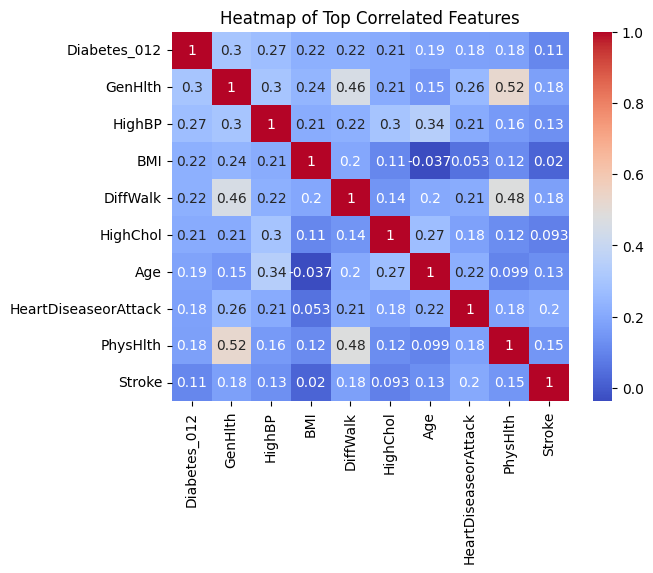

In [25]:
import seaborn as sns

correlations = df.corr()['Diabetes_binary'].sort_values(ascending=False)
print(correlations.head(10))

top_corr_features = correlations[1:11].index
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Top Correlated Features')
plt.show()


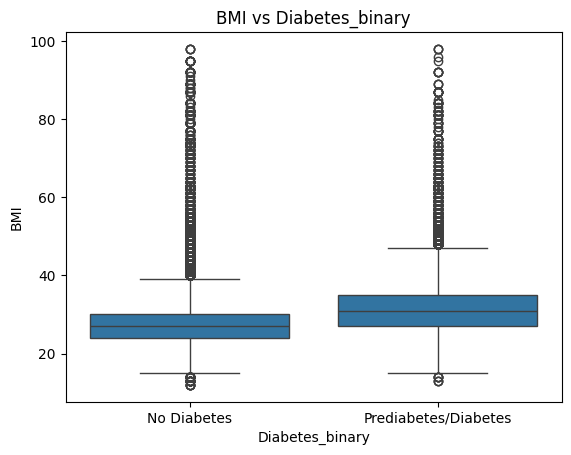

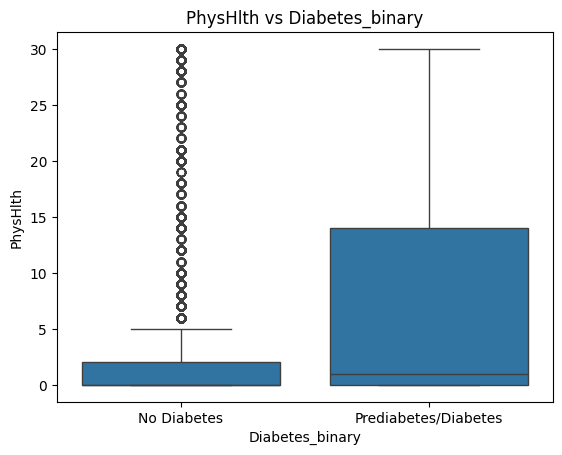

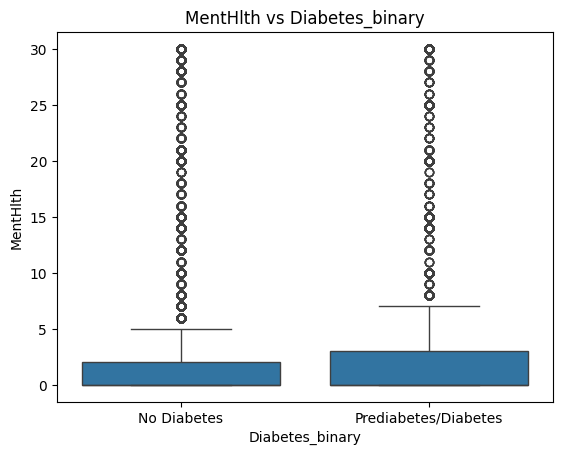

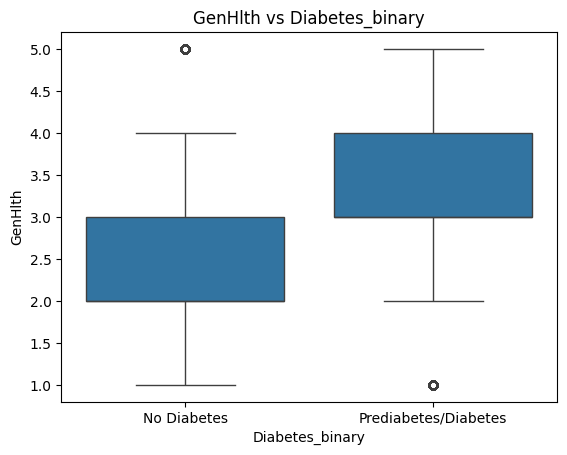

In [29]:
# Correct numerical features
num_features = ['BMI', 'PhysHlth', 'MentHlth', 'GenHlth']

for feature in num_features:
    sns.boxplot(x='Diabetes_binary', y=feature, data=df)
    plt.title(f'{feature} vs Diabetes_binary')
    plt.xticks([0, 1], ['No Diabetes', 'Prediabetes/Diabetes'])
    plt.show()


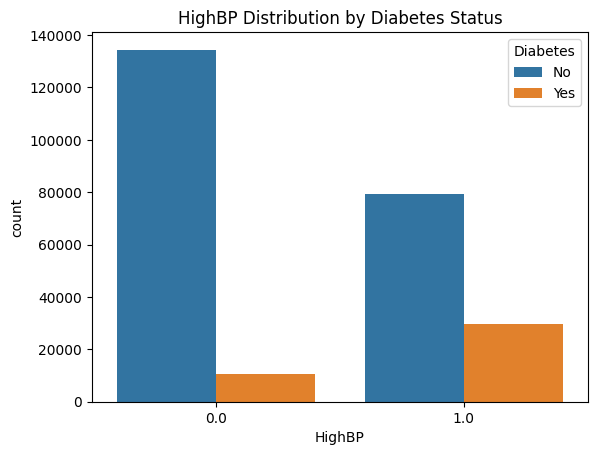

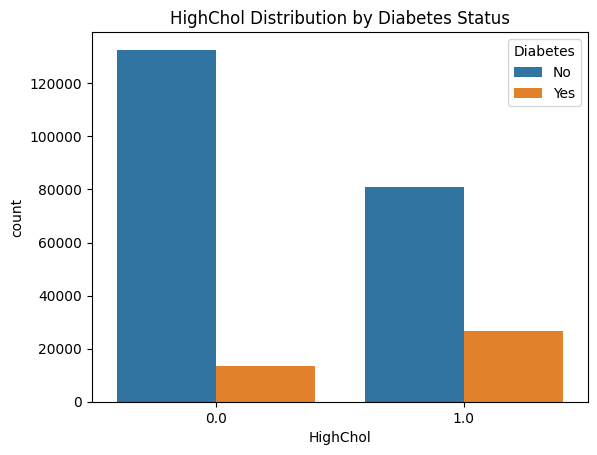

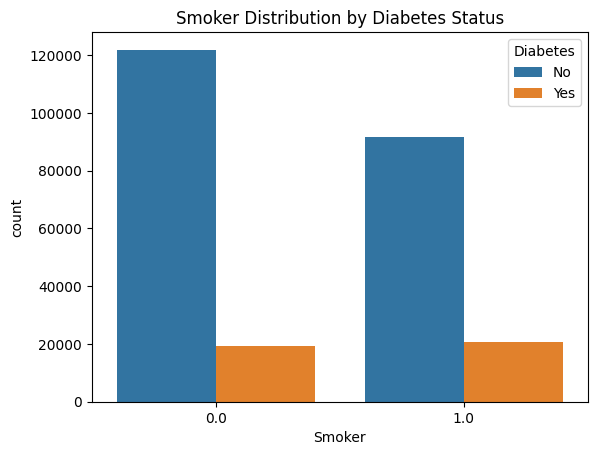

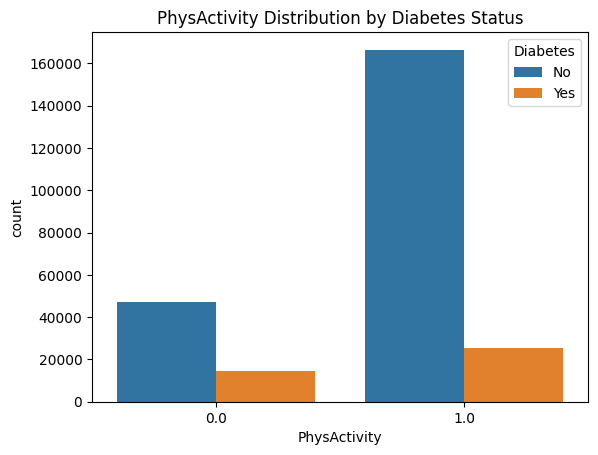

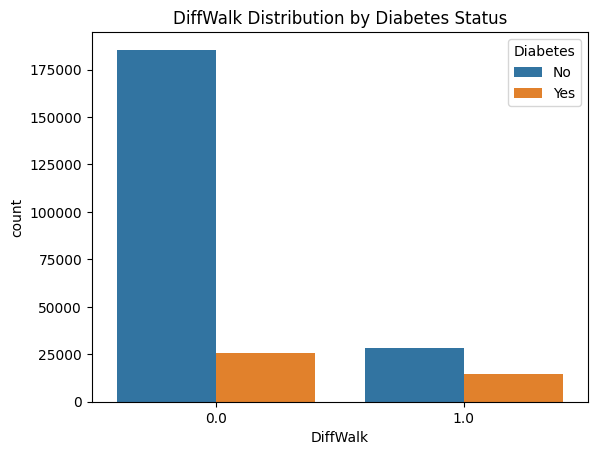

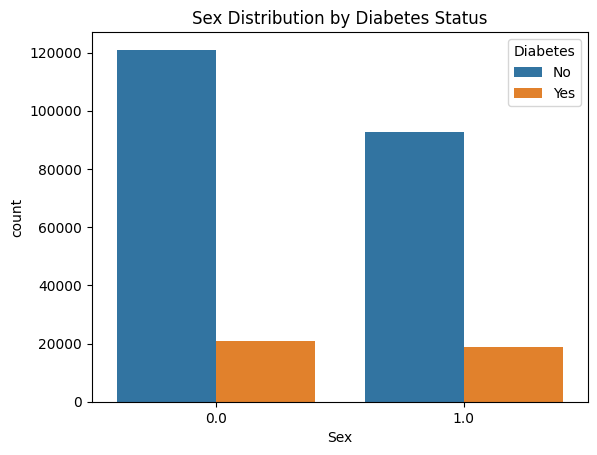

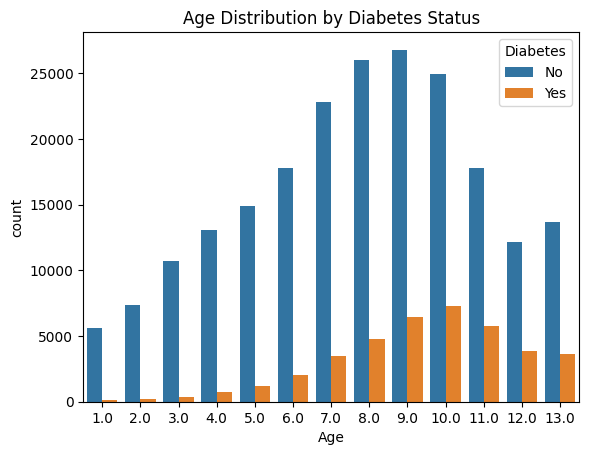

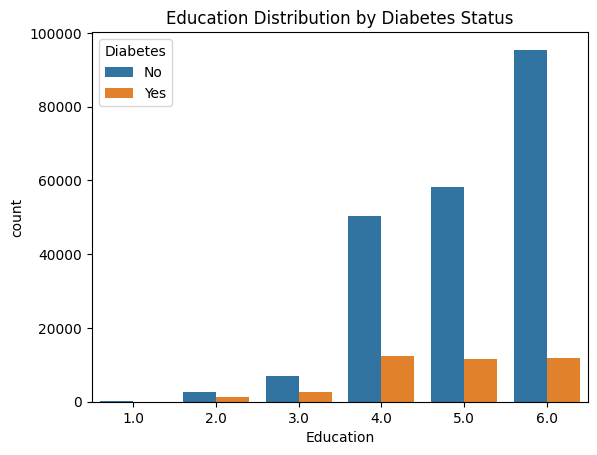

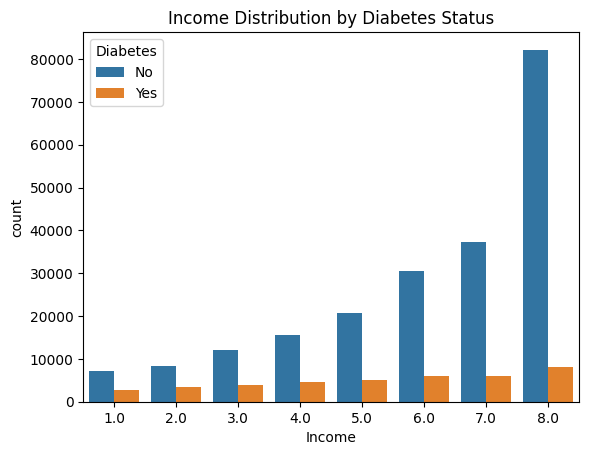

In [30]:
cat_features = ['HighBP', 'HighChol', 'Smoker', 'PhysActivity', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

for feature in cat_features:
    sns.countplot(x=feature, hue='Diabetes_binary', data=df)
    plt.title(f'{feature} Distribution by Diabetes Status')
    plt.legend(title='Diabetes', labels=['No', 'Yes'])
    plt.show()


In [31]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop(columns=['Diabetes_012', 'Diabetes_binary'])
y = df['Diabetes_binary']

selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X, y)

scores = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': selector.scores_
}).sort_values(by='F-Score', ascending=False)

print(scores)


                 Feature       F-Score
13               GenHlth  25233.520776
0                 HighBP  20000.580081
3                    BMI  13382.153421
16              DiffWalk  13169.679188
1               HighChol  11737.119165
18                   Age   9079.734633
6   HeartDiseaseorAttack   8198.136219
15              PhysHlth   8009.451199
20                Income   7807.367493
19             Education   4484.838371
7           PhysActivity   3794.105492
5                 Stroke   2817.079573
14              MentHlth   1433.890905
2              CholCheck   1174.232765
4                 Smoker   1003.709349
9                Veggies    892.757675
10     HvyAlcoholConsump    817.669981
8                 Fruits    450.156399
12           NoDocbcCost    367.333333
17                   Sex    222.541865
11         AnyHealthcare     50.295216


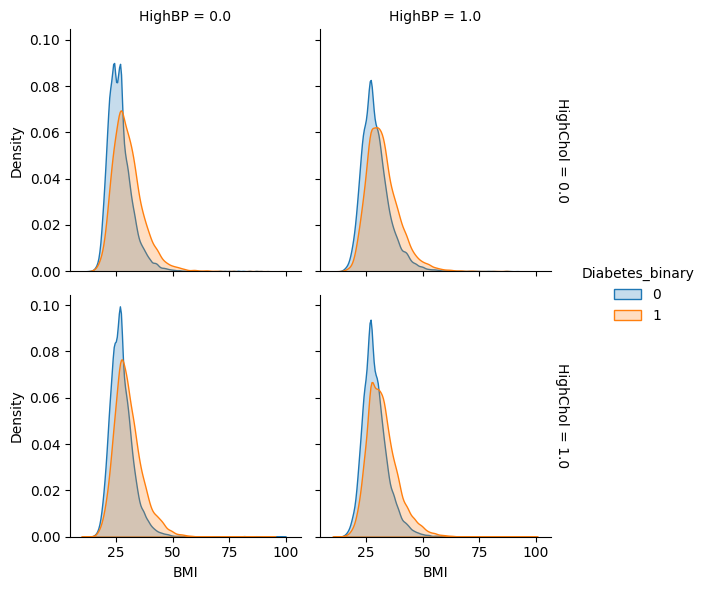

In [32]:
# BMI vs. Diabetes by HighBP & HighChol
g = sns.FacetGrid(df, col='HighBP', row='HighChol', hue='Diabetes_binary', margin_titles=True)
g.map_dataframe(sns.kdeplot, x='BMI', fill=True)
g.add_legend()
plt.show()
